<a href="https://colab.research.google.com/github/jungmin0710/K-digital-PythonMachineLearning/blob/main/Kaggle_Fraud_Detection_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kaggle 신용카드 사기 검출(Google Drive Mount)
https://www.kaggle.com/mlg-ulb/creditcardfraud

### Credit Card Fraud Detection
* creditcard.csv(284,807 * 31)
* Class : 0(정상), 1(사기)
* 사기 검출(Fraud Detection), 이상 탐지(Anomaly Detection)

* 조건
1. Fraud_Detection_작성자이름.ipynb
2. 탐색적데이터분석(EDA)
3. y -> 'class'(0:정상, 1:부정)
4. train_test_split - 7:3, stratify
5. 다양한 분류 모델링 수행
6. Metric -> 'accuracy','recall'
7. 성능이 가장 좋은 모델 선택

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier

## 1.Google Drive Mount
* 'creditCardFraud.zip' 파일을 구글드라이브에 업로드 후 진행

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


* 마운트 결과 확인

In [ ]:
!ls -l '/content/drive/My Drive/Colab Notebooks/datasets/creditCardFraud.zip'

-rw------- 1 root root 69155672 Mar  4 04:46 '/content/drive/My Drive/Colab Notebooks/datasets/creditCardFraud.zip'


## 2.Data Preprocessing
> 1) Unzip 'creditCardFraud.zip'
* Colab 파일 시스템에 'creditcard.csv'파일 생성

In [ ]:
!unzip /content/drive/My\ Drive/Colab\ Notebooks/datasets/creditCardFraud.zip

Archive:  /content/drive/My Drive/Colab Notebooks/datasets/creditCardFraud.zip
  inflating: creditcard.csv          


In [ ]:
!ls -l

total 147304
-rw-r--r-- 1 root root 150828752 Sep 20  2019 creditcard.csv
drwx------ 5 root root      4096 Mar  9 04:33 drive
drwxr-xr-x 1 root root      4096 Mar  5 14:37 sample_data


> 2) 데이터 읽어오기
* pandas DataFrame

In [ ]:
%%time

DF = pd.read_csv('creditcard.csv')

DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
DF.head()
#표준화 값(Normalization)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


> * 0(정상) Class와 1(사기) Class 개수

In [ ]:
DF.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

> * 0(정상) Class와 1(사기) Class 비율

In [ ]:
(DF.Class.value_counts() / DF.shape[0] * 100)

0    99.827251
1     0.172749
Name: Class, dtype: float64

> 3) Time 열(Column) 삭제

In [ ]:
DF.drop('Time', axis = 1, inplace = True)

DF.head(1)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.5516,-0.617801,-0.99139,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0


> 4) train_test_split
* X(Input), y(Output) 지정

In [ ]:
X = DF.iloc[:,:-1]
y = DF.iloc[:,-1]

X.shape, y.shape

((284807, 29), (284807,))

> (1) Without 'stratify'

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.3,
                                                    random_state = 2045)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((199364, 29), (199364,), (85443, 29), (85443,))

> * Train_Data 와 Test_Data의 1(부정) 비율이 불균형

In [ ]:
print('Train_Data : ', '\n', (y_train.value_counts() / y_train.shape[0]) * 100)
print('Test_Data : ', '\n', (y_test.value_counts() / y_test.shape[0]) * 100)

Train_Data :  
 0    99.825445
1     0.174555
Name: Class, dtype: float64
Test_Data :  
 0    99.831467
1     0.168533
Name: Class, dtype: float64


> (2) With 'Stratify'

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.3,
                                                    stratify = y,
                                                    random_state = 2045)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((199364, 29), (199364,), (85443, 29), (85443,))

> * Train_Data와 Test_Data의 1(부정) 비율이 균형

In [ ]:
print('Train_Data : ', '\n', (y_train.value_counts() / y_train.shape[0]) * 100)
print('Test_Data : ', '\n', (y_test.value_counts() / y_test.shape[0]) * 100)

Train_Data :  
 0    99.827451
1     0.172549
Name: Class, dtype: float64
Test_Data :  
 0    99.826785
1     0.173215
Name: Class, dtype: float64


## 3.Modeling

### 1.Logistic Regression

In [ ]:
%%time

LR = LogisticRegression(C = 0.5, #0.5 정도에서 recall이 높음
                        penalty = 'l2', #l1, none 보다 l2가 recall이 높음
                        multi_class = 'multinomial',
                        n_jobs = -1)

LR.fit(X_train, y_train)

CPU times: user 80.8 ms, sys: 63.9 ms, total: 145 ms
Wall time: 9.8 s


In [ ]:
# 예측결과 : p => 사기(1)  n => 정상(0)

print(accuracy_score(y_test, LR.predict(X_test)), '\n')
print(recall_score(y_test, LR.predict(X_test)), '\n') #사기인데 사기로 탐지못함 => 36
print(confusion_matrix(y_test, LR.predict(X_test),labels = [1,0]))

0.9993797034280163 

0.7567567567567568 

[[  112    36]
 [   17 85278]]


### 2.Decision Tree Classifier

In [ ]:
%%time

DT = DecisionTreeClassifier(criterion = 'entropy',
                            max_depth = 3, #1~13까지 중에서 3이 오류갯수가 제일 낮음
                            random_state = 2045)

DT.fit(X_train, y_train)

CPU times: user 4.77 s, sys: 2.02 ms, total: 4.78 s
Wall time: 4.77 s


In [ ]:
print(accuracy_score(y_test, DT.predict(X_test)), '\n')
print(recall_score(y_test, DT.predict(X_test)), '\n')
print(confusion_matrix(y_test, DT.predict(X_test),labels = [1,0]))
print('\n', DT.feature_importances_)

0.9992977774656788 

0.8445945945945946 

[[  125    23]
 [   37 85258]]

 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.12044766 0.         0.
 0.         0.75854109 0.         0.         0.12101125 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]


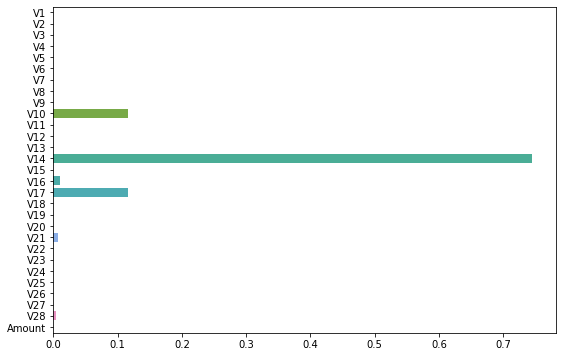

In [ ]:
plt.figure(figsize = (9,6))
sns.barplot(DT.feature_importances_,
            ['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','Amount'])
plt.show()

### 3.Random Forest Classifier

In [ ]:
%%time

#시간이 없어서 일단 중단......
#hyperparameter tuning
RF = RandomForestClassifier()

params = {'n_estimators' : [100,300],
          'max_features' : [3,4,5],
          'max_depth' : [3,4,5],
          'random_state' : [2045]}

CV = GridSearchCV(RF,
                     param_grid = params,
                     scoring = 'recall',
                     cv = KFold(n_splits = 5, random_state = 2045),
                     refit = True,
                     n_jobs = -1)

CV.fit(X_train, y_train)
RF_CV = CV.best_estimator_
print(CV.best_estimator_)

In [ ]:
print(accuracy_score(y_test, RF_CV.predict(X_test)), '\n')
print(recall_score(y_test, RF_CV.predict(X_test)), '\n')
print(confusion_matrix(y_test, RF_CV.predict(X_test),labels = [1,0]))
print('\n', RF_CV.feature_importances_)

In [ ]:
plt.figure(figsize = (9,6))
sns.barplot(RF.feature_importances_,
            ['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','Amount'])
plt.show()

### 4.Gradient Boosting Machine(GBM) Classifier

In [ ]:
%%time

GBC = GradientBoostingClassifier(loss = 'deviance',
                                 n_estimators = 500,# 오래걸려서 나중에 변경
                                 learning_rate = 0.01,
                                 max_features = 3,
                                 max_depth = 3)

GBC.fit(X_train, y_train)

In [ ]:
print(accuracy_score(y_test, GBC.predict(X_test)), '\n')
print(recall_score(y_test, GBC.predict(X_test)), '\n')
print(confusion_matrix(y_test, GBC.predict(X_test),labels = [1,0]))
print('\n',GBC.feature_importances_)

In [ ]:
plt.figure(figsize = (9,6))
sns.barplot(GBC.feature_importances_,
            ['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','Amount'])
plt.show()

### 5.Adaptive Boosting Classifier

In [ ]:
%%time

ABC = AdaBoostClassifier(n_estimators = 100, #오래걸려서 나중에 변경
                         learning_rate = 0.001,
                         random_state = 2045)

ABC.fit(X_train, y_train)

CPU times: user 1min 58s, sys: 218 ms, total: 1min 58s
Wall time: 1min 58s


In [ ]:
print(accuracy_score(y_test, ABC.predict(X_test)), '\n')
print(recall_score(y_test, ABC.predict(X_test)), '\n')
print(confusion_matrix(y_test, ABC.predict(X_test),labels = [1,0]))
print('\n',ABC.feature_importances_)

0.99916903666772 

0.6351351351351351 

[[   94    54]
 [   17 85278]]

 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.15 0.   0.
 0.   0.   0.85 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.  ]


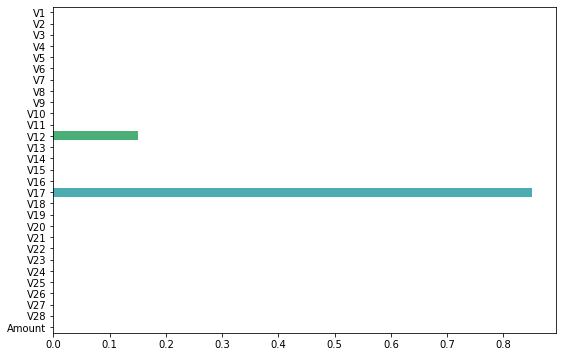

In [ ]:
plt.figure(figsize = (9,6))
sns.barplot(ABC.feature_importances_,
            ['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','Amount'])
plt.show()

### 6.eXtra Gradient Boost(XGBoost) Classifier

In [ ]:
%%time

XGB = XGBClassifier(boosster = 'gbtree',
                    n_estimators = 1000,
                    learning_Rate = 0.5,
                    reg_lambda = 0.05,
                    n_jobs = -1)

XGB.fit(X_train, y_train)

CPU times: user 6min 11s, sys: 301 ms, total: 6min 12s
Wall time: 3min 8s


In [ ]:
print(accuracy_score(y_test, XGB.predict(X_test)), '\n')
print(recall_score(y_test, XGB.predict(X_test)), '\n')
print(confusion_matrix(y_test, XGB.predict(X_test),labels = [1,0]))
print('\n',XGB.feature_importances_)

0.9995903701883126 

0.831081081081081 

[[85285    10]
 [   25   123]]
[0.02137055 0.01803964 0.02181529 0.0368795  0.01938154 0.01427187
 0.03985074 0.0239018  0.01522087 0.06282447 0.01123454 0.03801052
 0.02500294 0.12001529 0.01372827 0.01966675 0.27176946 0.01538103
 0.01867533 0.0259205  0.01964945 0.01270124 0.0098273  0.01461277
 0.0147241  0.02427466 0.02466051 0.02184631 0.02474281]


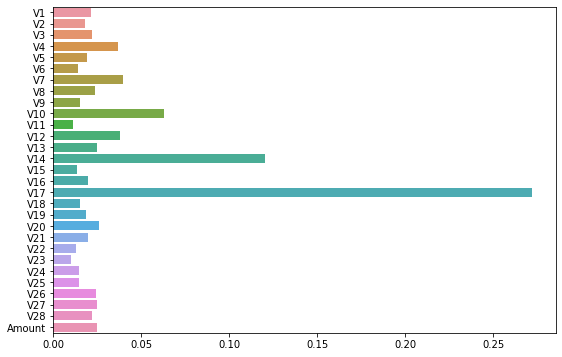

In [ ]:
plt.figure(figsize = (9,6))
sns.barplot(XGB.feature_importances_,
            ['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','Amount'])
plt.show()

### 7.LightGBM Classifier

In [ ]:
%%time

LGB = LGBMClassifier(n_estimators = 1000,
                     max_depth = 4, #2,3,4,5중 recall높음
                     learning_rate = 0.005,
                     reg_lambda = 0.2,
                     n_jobs = -1)

LGB.fit(X_train, y_train)

CPU times: user 49 s, sys: 137 ms, total: 49.1 s
Wall time: 25.1 s


In [ ]:
print(accuracy_score(y_test, LGB.predict(X_test)), '\n')
print(recall_score(y_test, LGB.predict(X_test)), '\n')
print(confusion_matrix(y_test, LGB.predict(X_test),labels = [1,0]))
print('\n',LGB.feature_importances_)

0.9995552590615966 

0.8108108108108109 

[[  120    28]
 [   10 85285]]

 [ 641  210  425 1185  294  293  796  507  157  499  461  471  401 1150
  203  525  414  221  343  412  312  417  280  304  232  774  158  494
  994]


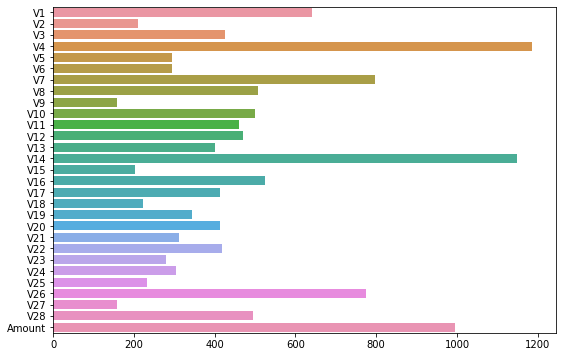

In [ ]:
plt.figure(figsize = (9,6))
sns.barplot(LGB.feature_importances_,
            ['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','Amount'])
plt.show()

### 8.K-Nearest Neighbors Classifier

In [ ]:
%%time

KNN = KNeighborsClassifier(n_neighbors = 5,#2,3,4,5,6 중 recall이 제일 높음
                           n_jobs = -1)

KNN.fit(X_train, y_train)

CPU times: user 1.3 s, sys: 4.01 ms, total: 1.31 s
Wall time: 1.31 s


In [ ]:
print(accuracy_score(y_test, KNN.predict(X_test)), '\n')
print(recall_score(y_test, KNN.predict(X_test)), '\n')
print(confusion_matrix(y_test, KNN.predict(X_test),labels = [1,0]))

0.9993211848834895 

0.6824324324324325 

[[  101    47]
 [   11 85284]]


## 4.종합결과


In [ ]:
result = pd.DataFrame(data = {'Name' : ['LR','DT',
                                        #'RF_CV',
                                        'GBC','ABC','XGB','LGB','KNN'],
                              'Accuracy' : [accuracy_score(y_test, LR.predict(X_test)),
                                            accuracy_score(y_test, DT.predict(X_test)),
                                            #accuracy_score(y_test, RF_CV.predict(X_test)),
                                            accuracy_score(y_test, GBC.predict(X_test)),
                                            accuracy_score(y_test, ABC.predict(X_test)),
                                            accuracy_score(y_test, XGB.predict(X_test)),
                                            accuracy_score(y_test, LGB.predict(X_test)),
                                            accuracy_score(y_test, KNN.predict(X_test))],
                              'Recall' : [recall_score(y_test, LR.predict(X_test)),
                                            recall_score(y_test, DT.predict(X_test)),
                                            #recall_score(y_test, RF_CV.predict(X_test)),
                                            recall_score(y_test, GBC.predict(X_test)),
                                            recall_score(y_test, ABC.predict(X_test)),
                                            recall_score(y_test, XGB.predict(X_test)),
                                            recall_score(y_test, LGB.predict(X_test)),
                                            recall_score(y_test, KNN.predict(X_test))]})

result

,Name,Accuracy,Recall
0,LR,0.999380,0.756757
1,DT,0.999356,0.844595
2,GBC,0.999473,0.763514
3,ABC,0.999169,0.635135
4,XGB,0.999590,0.831081
5,LGB,0.999555,0.810811
6,KNN,0.999321,0.682432


### 1.Accuracy 비교

In [ ]:
result = result.sort_values(['Accuracy']).reset_index(drop=True)
print (result)

  Name  Accuracy    Recall
0  ABC  0.999169  0.635135
1  KNN  0.999321  0.682432
2   DT  0.999356  0.844595
3   LR  0.999380  0.756757
4  GBC  0.999473  0.763514
5  LGB  0.999555  0.810811
6  XGB  0.999590  0.831081


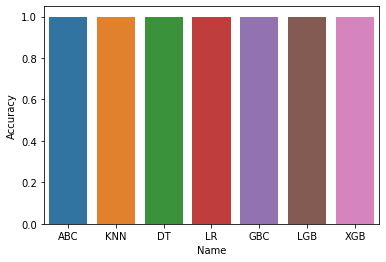

In [ ]:
sns.barplot(data = result, x = 'Name', y = 'Accuracy')

plt.show()

### 2.Recall 비교
사기로 예측된 건 중 오류인 경우를 줄이는 것이 가장 이상적이기 때문에, recall율이 높을수록 좋은 모델이다.

In [ ]:
result = result.sort_values(['Recall']).reset_index(drop=True)
print (result)

  Name  Accuracy    Recall
0  ABC  0.999169  0.635135
1  KNN  0.999321  0.682432
2   LR  0.999380  0.756757
3  GBC  0.999473  0.763514
4  LGB  0.999555  0.810811
5  XGB  0.999590  0.831081
6   DT  0.999356  0.844595


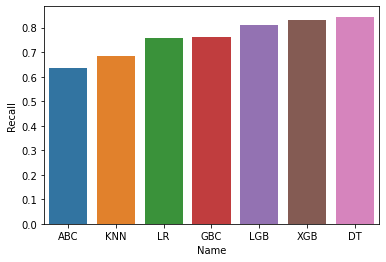

In [ ]:
sns.barplot(data = result, x = 'Name', y = 'Recall')

plt.show()